# Problem Set on Tutorial on Numpy, Scipy and Astropy

I hope you guys have seen the lecture and also the companion notebook. In this notebook there are few problems and some hints on how to approach them. This problems are not solely on Astronomy. They contains varity of things but all of these are needed to go further in Astronomy and Cosmology.

So, let's begin

In [1]:
#!pip install jupyterquiz
#run this if this is not installed

In [2]:
#Also go to Kernel and run Restart and Run all before starting this section.
#Without that the questions will not work properly and also connect to internet.
from jupyterquiz import display_quiz
from IPython.display import HTML

In [3]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [4]:
#start with importing all we need
#import numpy as np
# import matplotlib.pyplot as plt
#so on

## Question-1

Write a Simple python function to calculate **Escape Velocity** of any celestrial body. Calculate the value for earth.

### Hints
<details>
<summary>Forget what is Escape veloctiy?</summary>
It is the minimum velocity needed to escape from gravitational binding.
It is given by v=2GMR
</details>

In [5]:
#Your Answer
#def v(M,R):

In [6]:
import math

def kacis_hizi(m, r):
    G = 6.674 * 10**-11  
    v = math.sqrt(2 * G * m / r) 
    return v

dunya_kutlesi = 5.972 * 10**24  
dunya_yaricapi = 6.371 * 10**6   

dunya_kacis_hizi = kacis_hizi(dunya_kutlesi, dunya_yaricapi)
print(f"Dünya'nın kaçış hızı: {dunya_kacis_hizi:.2f} m/s")

Dünya'nın kaçış hızı: 11185.73 m/s


In [7]:
display_quiz(git_path+"question1.json")#These are for interactive questions

<IPython.core.display.Javascript object>

Can you show why Oxygen molecules cannot go out of earth's atmosphere?
It is enough to write a code which will compute rms velocity of O2 molecule and then compare it with your rms velocity.

In [8]:
import math

def rms_speed(k, T, m):
    return math.sqrt(3 * k * T / m)

k = 1.38e-23  
T = 298  
m_oxygen = 32e-3 / 6.022e23  

oxygen_rms = rms_speed(k, T, m_oxygen)

human_rms = 1.5 

print(f"Oxygen molecule RMS speed: {oxygen_rms:.2f} m/s")
print(f"Human RMS speed: {human_rms:.2f} m/s")

if oxygen_rms < human_rms:
    print("Oxygen molecules do not have enough speed to escape Earth's atmosphere.")
else:
    print("Oxygen molecules have enough speed to escape the atmosphere.")

Oxygen molecule RMS speed: 481.84 m/s
Human RMS speed: 1.50 m/s
Oxygen molecules have enough speed to escape the atmosphere.


## Question-2

Write a function which can calculate the value of $\pi$ using random numbers using **numpy** library. Try using 1000 sample

In [9]:
#Write your code

In [10]:
import numpy as np

def calculate_pi(samples=1000):
    x = np.random.rand(samples)
    y = np.random.rand(samples)
    
    inside_circle = (x**2 + y**2) <= 1
    count_inside = np.sum(inside_circle)
    
    pi_estimate = (count_inside / samples) * 4
    return pi_estimate

pi_value = calculate_pi(1000)
print(f"Estimated value of π: {pi_value:.6f}")

Estimated value of π: 3.232000


In [11]:
display_quiz(git_path+"question2.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

In [12]:
import numpy as np

numbers = np.arange(0, 10001)

mask = (numbers % 4 != 0) & (numbers % 7 != 0)

result = np.sum(numbers[mask])

print(f"The sum of numbers from 0 to 10000 excluding those divisible by 4 or 7 is: {result}")

The sum of numbers from 0 to 10000 excluding those divisible by 4 or 7 is: 32147142


In [13]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

In [14]:
#your code

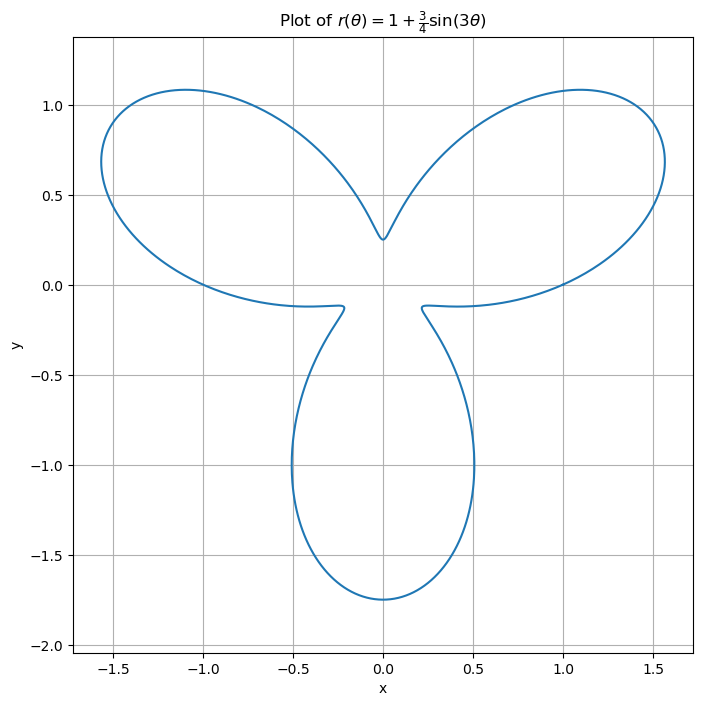

In [15]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 1000)

r = 1 + (3/4) * np.sin(3 * theta)

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.title(r'Plot of $r(\theta) = 1 + \frac{3}{4} \sin(3\theta)$')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()

In [16]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Not a question but a suggestion.

Try solving any KVL or KCL problem using numpy.(Linear equation solution)

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

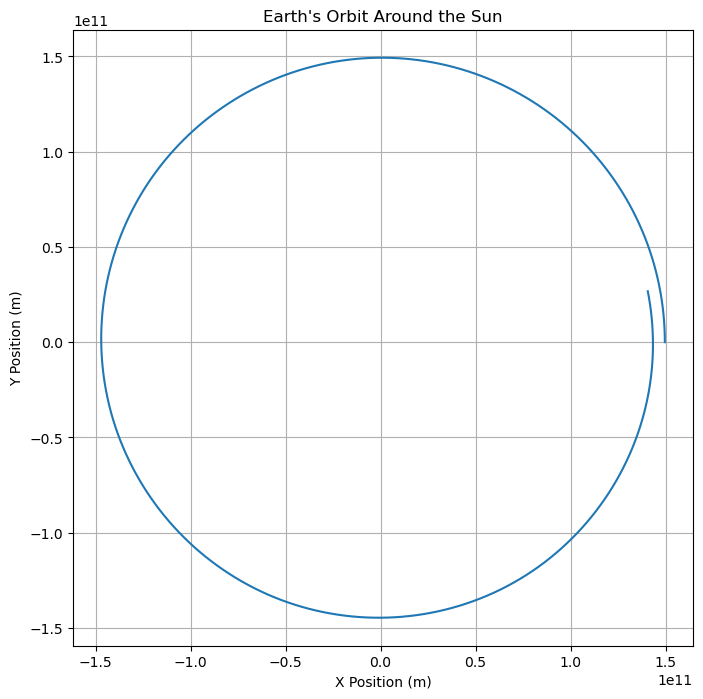

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from astropy.constants import G, M_sun
from astropy import units as u

G = G.value  
M = M_sun.value  

def equations(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M * x / r**3  
    ay = -G * M * y_pos / r**3  
    return [vx, vy, ax, ay]

x0 = 1.496e11 
y0 = 0
vx0 = 0  
vy0 = 29780  

t_span = (0, 3.154e7) 
initial_conditions = [x0, y0, vx0, vy0]

solution = solve_ivp(equations, t_span, initial_conditions, t_eval=np.linspace(0, 3.154e7, 1000))

x = solution.y[0]
y = solution.y[1]

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.title("Earth's Orbit Around the Sun")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis('equal')
plt.grid()
plt.show()

In [18]:
#solution

## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

In [19]:
#When error is known the way to use curve_fit is 
#para, pcov = curve_fit(x, y, fit_func, p0=(T0,), sigma=σ, absolute_sigma=True)

Estimated Temperature: 2.70 K
Estimated Error: inf K


C:\Users\fatih serdar\AppData\Local\Temp\ipykernel_11788\3268631342.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(black_body_radiation, nu, I_measured, p0=(initial_guess,), sigma=σ, absolute_sigma=True)


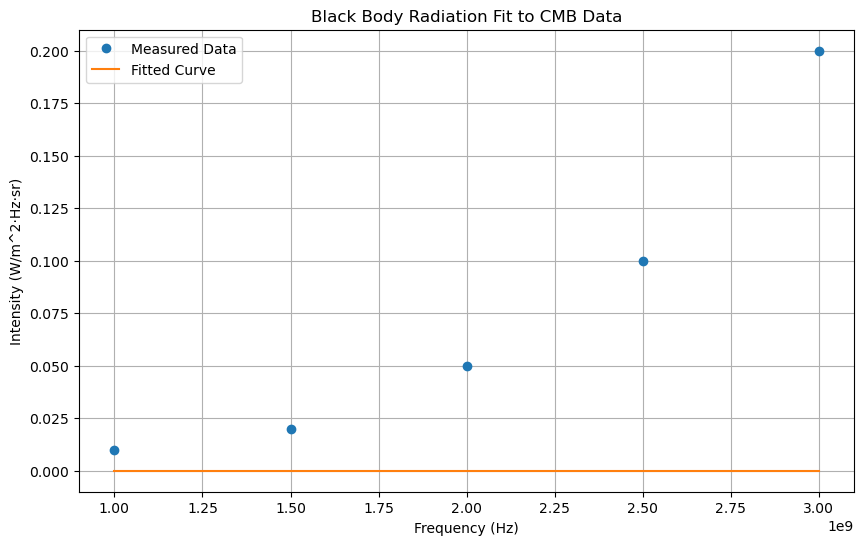

In [20]:
import pandas as pd
from scipy.optimize import curve_fit

h = 6.626e-34  
c = 3.0e8      
k = 1.381e-23  

def black_body_radiation(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

data = pd.DataFrame({
    'Frequency': [1e9, 1.5e9, 2e9, 2.5e9, 3e9],  
    'Intensity': [0.01, 0.02, 0.05, 0.1, 0.2]  
})

nu = data['Frequency'].values 
I_measured = data['Intensity'].values 

σ = 0.1 * I_measured  

initial_guess = 2.7 
try:
    popt, pcov = curve_fit(black_body_radiation, nu, I_measured, p0=(initial_guess,), sigma=σ, absolute_sigma=True)

    T_estimated = popt[0]
    T_error = np.sqrt(np.diag(pcov))[0]

    print(f"Estimated Temperature: {T_estimated:.2f} K")
    print(f"Estimated Error: {T_error:.2f} K")

    plt.figure(figsize=(10, 6))
    plt.plot(nu, I_measured, 'o', label='Measured Data')
    plt.plot(nu, black_body_radiation(nu, T_estimated), '-', label='Fitted Curve')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Intensity (W/m^2·Hz·sr)')
    plt.title('Black Body Radiation Fit to CMB Data')
    plt.legend()
    plt.grid()
    plt.show()

except ValueError as e:
    print("An error occurred:", e)

In [21]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [22]:
#solution

In [23]:
from astropy.constants import m_p, c, e

E_joule = (m_p * c**2).to('J')

e_J = e.si.value  
E_MeV = E_joule.value / (e_J * 1e6)

print(f"E0 (Joule) = {E_joule.value:.6e} J")
print(f"E0 (MeV)   = {E_MeV:.4f} MeV")

E0 (Joule) = 1.503278e-10 J
E0 (MeV)   = 938.2721 MeV


In [24]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

### Theory needed for problem-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

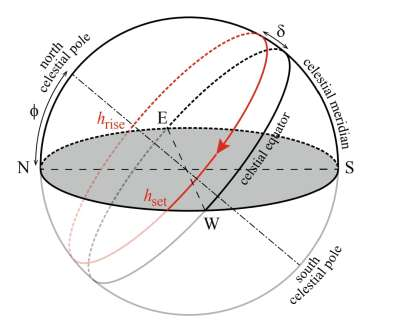

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for the star Procyon.

In [25]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Procyon')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (114.82549791, 5.22498756)>
5d13m29.9552052s
22d29m28.3s


In [26]:
#Now, calculate h
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.6086674498080988
T =  12.289314068543636 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Problem-8**: Find how long the star `Betelgeuse` is present on sky from my location (Jadavpur, Kolkata, India).

In [27]:
#Solution

In [28]:
display_quiz(git_path+"question8.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

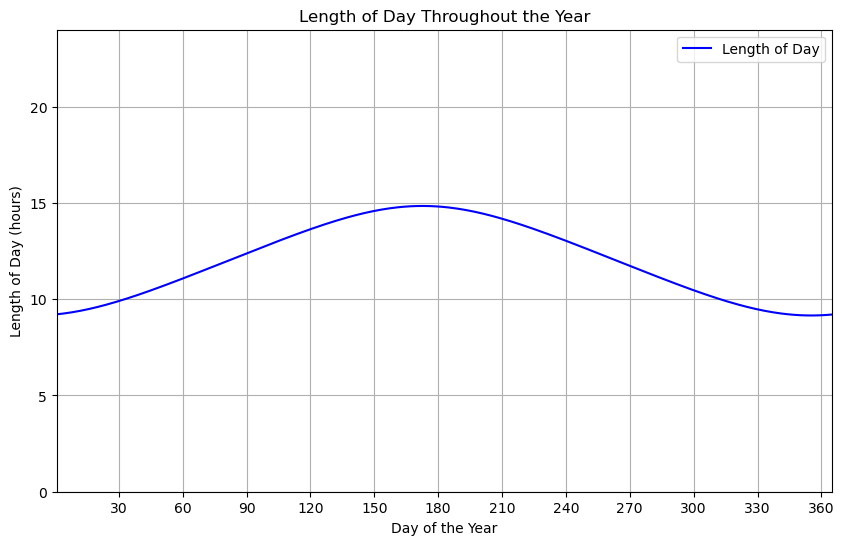

In [29]:
import numpy as np
import matplotlib.pyplot as plt

epsilon_0 = 23.44 
days_in_year = 365.24
latitude = 40.0 

epsilon_0_rad = np.radians(epsilon_0)
latitude_rad = np.radians(latitude)

N = np.arange(1, 366)

delta_s = -np.arcsin(np.sin(epsilon_0_rad) * np.cos(2 * np.pi / days_in_year * (N + 10)))

L = (24 / np.pi) * np.arccos(-np.tan(latitude_rad) * np.tan(delta_s))

plt.figure(figsize=(10, 6))
plt.plot(N, L, label='Length of Day', color='blue')
plt.title('Length of Day Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Length of Day (hours)')
plt.xticks(np.arange(0, 366, 30))  
plt.grid()
plt.legend()
plt.xlim(1, 365)
plt.ylim(0, 24)
plt.show()

## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

In [30]:
#Solution

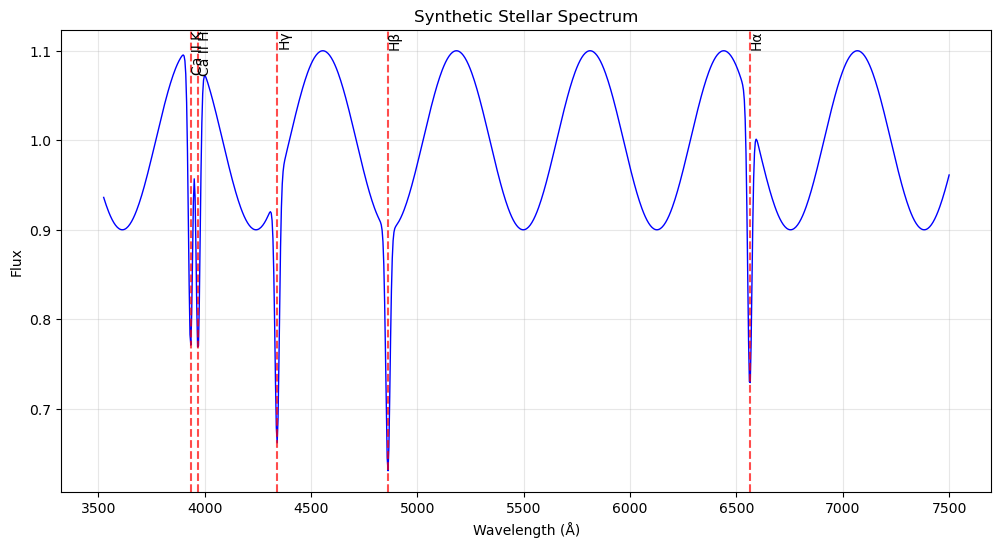

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

def plot_spectrum(fits_file):
    """
    Plot spectrum from FITS file
    """
    # Open FITS file
    hdul = fits.open(fits_file)
    data = hdul[0].data
    header = hdul[0].header
    
    # Get object name
    obj_name = header.get('OBJECT', 'Unknown')
    
    # Extract flux data
    flux = data[0]  # Assuming first row contains flux
    
    # Create wavelength array using header information
    crpix1 = header.get('CRPIX1', 1.0)
    crval1 = header.get('CRVAL1', 3500.0)  # central wavelength of first pixel
    cdelt1 = header.get('CDELT1', 0.9)     # linear dispersion (Angstrom/pixel)
    
    # Calculate wavelength for each pixel
    pixels = np.arange(len(flux))
    wavelength = crval1 + (pixels - crpix1 + 1) * cdelt1
    
    # Plot the spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(wavelength, flux, 'b-', linewidth=1)
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux')
    plt.title(f'Spectrum of {obj_name}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print some basic information
    print(f"Object: {obj_name}")
    print(f"Wavelength range: {wavelength[0]:.1f} - {wavelength[-1]:.1f} Å")
    print(f"Spectral resolution: {cdelt1:.1f} Å/pixel")
    
    return wavelength, flux

# If you have a FITS file, uncomment and modify the filename:
# wavelength, flux = plot_spectrum('your_spectrum_file.fits')

# Example with synthetic data (if you don't have the actual FITS file)
def create_synthetic_spectrum():
    """Create a synthetic spectrum for demonstration"""
    wavelength = np.linspace(3525, 7500, 1000)
    
    # Create a synthetic spectrum with some absorption lines
    flux = 1.0 + 0.1 * np.sin(wavelength / 100)  # Continuum
    
    # Add some absorption lines (common in stellar spectra)
    lines = [3933.7, 3968.5, 4340.5, 4861.3, 6562.8]  # Ca II, H lines
    for line in lines:
        if wavelength.min() <= line <= wavelength.max():
            # Add Gaussian absorption
            flux *= (1 - 0.3 * np.exp(-(wavelength - line)**2 / (2 * 10**2)))
    
    return wavelength, flux

# Plot synthetic spectrum
wavelength, flux = create_synthetic_spectrum()
plt.figure(figsize=(12, 6))
plt.plot(wavelength, flux, 'b-', linewidth=1)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('Synthetic Stellar Spectrum')
plt.grid(True, alpha=0.3)

# Mark some common spectral lines
lines = {'Ca II K': 3933.7, 'Ca II H': 3968.5, 'Hγ': 4340.5, 'Hβ': 4861.3, 'Hα': 6562.8}
for name, line in lines.items():
    if wavelength.min() <= line <= wavelength.max():
        plt.axvline(x=line, color='r', linestyle='--', alpha=0.7)
        plt.text(line, plt.ylim()[1], name, rotation=90, verticalalignment='top')

plt.show()

https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [32]:
display_quiz(git_path+"question10.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Hope.... you guys enjoyed the assignment.